# ¿Cómo funciona la regresión logística?
Como en la regresión lineal, tenemos algunas variables de entrada, X1, X2, X3. La regresión lineal calcularía el peso de cada una de estas variables, agregaría un sesgo y devolvería una etiqueta (clase). De manera similar, en Regresión logística, se calculan las ponderaciones para cada variable de entrada (X1, X2, X3), se agrega un término de sesgo y luego se aplica una función logística a los resultados. Luego, la función devuelve un valor entre cero (clase negativa) y uno (clase positiva), que describe el valor de probabilidad de que el objeto de entrada pertenezca a la clase positiva.

# Carga y descripción del conjunto de datos

Primero, importaremos las dependencias, cargaremos los datos filtrados de la venta de los automóviles y echaremos un vistazo al marco de datos. Para usar la regresión logística, necesitamos importar la clase LogisticRegression del módulo de modelo de Scikit-Learn.

In [2]:
#Importamos la librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set()

In [3]:
df = pd.read_csv('datasets/dataset_listo_para_analisis.csv')

In [ ]:
cars = pd.read_csv('dataset_filtrado.csv')

In [ ]:
cars.head()

,Atributo Potencia,Atributo Largo,Atributo Cilindrada,Atributo Capacidad de personas,Atributo Control de tracción,Atributo Motor,Atributo Transmisión,Latitud,Longitud,Link Miniatura,Registro Vendedor,Link Vendedor,Atributo Versión,Atributo Año,Atributo Modelo,Atributo Kilómetros,Atributo Tipo de combustible,Atributo Puertas,Atributo Marca,ID,Atributo Condición del ítem,Cantidad Disponible,ID Vendedor,Vendedor de Autos,Agencia Inmobiliaria,Transacciones Totales Vendedor,Valoraciones Positivas Vendedor,Valoraciones Negativas Vendedor,Valoraciones Neutrales Vendedor,Precio,Moneda,Unidades Vendidas,Ciudad Vendedor,Tipo de Publicación,Fecha Finalización,Condición,Link,Acepta MercadoPago,Estado,Ciudad,País Vendedor,Titulo,Estado Vendedor,Precio USD,Kilómetros
0,105 hp,4310 mm,1.6 L,5.0,Delantera,1.6,Manual,-34.603683,-58.381557,http://http2.mlstatic.com/D_718345-MLA47368807...,2006-08-25T15:38:09.000-04:00,http://perfil.mercadolibre.com.ar/WILLYCHIARA,1.6 Family,1998,Applause,105000 km,Nafta,4,Daihatsu,MLA1101676302,Usado,1,97579117,False,False,12,1.0,0.0,0.0,440000,ARS,0,Villa Urquiza,gold_premium,2021-11-03T04:00:23.000Z,used,https://auto.mercadolibre.com.ar/MLA-110167630...,True,Capital Federal,Capital Federal,Argentina,Daihatsu Applause 1.6 Family 1998,Capital Federal,4400.0,105000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.786247,-58.622967,http://http2.mlstatic.com/D_773557-MLA47305486...,2015-06-05T13:11:10.000-04:00,http://perfil.mercadolibre.com.ar/BOPA4868085,Piaggio porter,1997,Piaggio,1234 km,Nafta,5,Daihatsu,MLA1100600678,Usado,1,184918168,False,False,0,1.0,0.0,0.0,480000,ARS,0,virrey del pino,gold_premium,2021-10-30T04:00:21.000Z,used,https://auto.mercadolibre.com.ar/MLA-110060067...,True,Bs.As. G.B.A. Oeste,La Matanza,Argentina,Daihatsu Piaggio Piaggio Porter,Buenos Aires,4800.0,1234
2,44 hp,3295 mm,0.8 L,5.0,Delantera,0.8,Manual,-34.603683,-58.381557,http://http2.mlstatic.com/D_618418-MLA47428215...,2018-07-05T16:31:37.000-04:00,http://perfil.mercadolibre.com.ar/VIRGILIO+AUT...,0.8,1996,Cuore,128000 km,Nafta,5,Daihatsu,MLA1102506351,Usado,1,333949511,True,False,0,0.0,0.0,0.0,450000,ARS,0,Monte Castro,gold,2021-10-17T22:15:16.000Z,used,https://auto.mercadolibre.com.ar/MLA-110250635...,True,Capital Federal,Capital Federal,Argentina,Daihatsu Cuore 1996 0.8,Capital Federal,4500.0,128000
3,84 hp,3840 mm,1.3 L,5.0,4x4,1.3,Manual,-34.668500,-58.728250,http://http2.mlstatic.com/D_664121-MLA46444666...,2019-12-09T10:48:36.000-04:00,http://perfil.mercadolibre.com.ar/MSH46SRL,1.3 Sx 4wd,1998,Terios,184000 km,Nafta,5,Daihatsu,MLA934672010,Usado,1,498558751,True,False,4,0.9,0.0,0.1,950000,ARS,0,Merlo,gold,2021-10-17T20:15:49.000Z,used,https://auto.mercadolibre.com.ar/MLA-934672010...,True,Bs.As. G.B.A. Oeste,Merlo,Argentina,Daihatsu Terios 1.3 Sx 4wd Cuero Full,Buenos Aires,9500.0,184000
4,105 hp,4310 mm,1.6 L,5.0,Delantera,1.6,Manual,-32.485264,-63.297504,http://http2.mlstatic.com/D_761194-MLA47247640...,2011-04-21T18:11:15.000-04:00,http://perfil.mercadolibre.com.ar/DOLOVENT,1.6 Prime,1992,Applause,230000 km,Nafta,4,Daihatsu,MLA936014311,Usado,1,52511584,False,False,0,0.0,0.0,0.0,100000,ARS,0,villa nueva,silver,2021-10-25T04:00:11.000Z,used,https://auto.mercadolibre.com.ar/MLA-936014311...,True,Córdoba,General San Martín,Argentina,Daihatsu Applause 1992 1.6 Prime,Córdoba,1000.0,230000


In [ ]:
cars

,Atributo Potencia,Atributo Largo,Atributo Cilindrada,Atributo Capacidad de personas,Atributo Control de tracción,Atributo Motor,Atributo Transmisión,Latitud,Longitud,Link Miniatura,Registro Vendedor,Link Vendedor,Atributo Versión,Atributo Año,Atributo Modelo,Atributo Kilómetros,Atributo Tipo de combustible,Atributo Puertas,Atributo Marca,ID,Atributo Condición del ítem,Cantidad Disponible,ID Vendedor,Vendedor de Autos,Agencia Inmobiliaria,Transacciones Totales Vendedor,Valoraciones Positivas Vendedor,Valoraciones Negativas Vendedor,Valoraciones Neutrales Vendedor,Precio,Moneda,Unidades Vendidas,Ciudad Vendedor,Tipo de Publicación,Fecha Finalización,Condición,Link,Acepta MercadoPago,Estado,Ciudad,País Vendedor,Titulo,Estado Vendedor,Precio USD,Kilómetros,clase de etiquetas
0,105 hp,4310 mm,1.6 L,5.0,Delantera,1.6,Manual,-34.603683,-58.381557,http://http2.mlstatic.com/D_718345-MLA47368807...,2006-08-25T15:38:09.000-04:00,http://perfil.mercadolibre.com.ar/WILLYCHIARA,1.6 Family,1998,Applause,105000 km,Nafta,4,Daihatsu,MLA1101676302,Usado,1,97579117,False,False,12,1.0,0.0,0.0,440000,ARS,0,Villa Urquiza,gold_premium,2021-11-03T04:00:23.000Z,used,https://auto.mercadolibre.com.ar/MLA-110167630...,True,Capital Federal,Capital Federal,Argentina,Daihatsu Applause 1.6 Family 1998,Capital Federal,4400.0,105000,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.786247,-58.622967,http://http2.mlstatic.com/D_773557-MLA47305486...,2015-06-05T13:11:10.000-04:00,http://perfil.mercadolibre.com.ar/BOPA4868085,Piaggio porter,1997,Piaggio,1234 km,Nafta,5,Daihatsu,MLA1100600678,Usado,1,184918168,False,False,0,1.0,0.0,0.0,480000,ARS,0,virrey del pino,gold_premium,2021-10-30T04:00:21.000Z,used,https://auto.mercadolibre.com.ar/MLA-110060067...,True,Bs.As. G.B.A. Oeste,La Matanza,Argentina,Daihatsu Piaggio Piaggio Porter,Buenos Aires,4800.0,1234,0
2,44 hp,3295 mm,0.8 L,5.0,Delantera,0.8,Manual,-34.603683,-58.381557,http://http2.mlstatic.com/D_618418-MLA47428215...,2018-07-05T16:31:37.000-04:00,http://perfil.mercadolibre.com.ar/VIRGILIO+AUT...,0.8,1996,Cuore,128000 km,Nafta,5,Daihatsu,MLA1102506351,Usado,1,333949511,True,False,0,0.0,0.0,0.0,450000,ARS,0,Monte Castro,gold,2021-10-17T22:15:16.000Z,used,https://auto.mercadolibre.com.ar/MLA-110250635...,True,Capital Federal,Capital Federal,Argentina,Daihatsu Cuore 1996 0.8,Capital Federal,4500.0,128000,1
3,84 hp,3840 mm,1.3 L,5.0,4x4,1.3,Manual,-34.668500,-58.728250,http://http2.mlstatic.com/D_664121-MLA46444666...,2019-12-09T10:48:36.000-04:00,http://perfil.mercadolibre.com.ar/MSH46SRL,1.3 Sx 4wd,1998,Terios,184000 km,Nafta,5,Daihatsu,MLA934672010,Usado,1,498558751,True,False,4,0.9,0.0,0.1,950000,ARS,0,Merlo,gold,2021-10-17T20:15:49.000Z,used,https://auto.mercadolibre.com.ar/MLA-934672010...,True,Bs.As. G.B.A. Oeste,Merlo,Argentina,Daihatsu Terios 1.3 Sx 4wd Cuero Full,Buenos Aires,9500.0,184000,0
4,105 hp,4310 mm,1.6 L,5.0,Delantera,1.6,Manual,-32.485264,-63.297504,http://http2.mlstatic.com/D_761194-MLA47247640...,2011-04-21T18:11:15.000-04:00,http://perfil.mercadolibre.com.ar/DOLOVENT,1.6 Prime,1992,Applause,230000 km,Nafta,4,Daihatsu,MLA936014311,Usado,1,52511584,False,False,0,0.0,0.0,0.0,100000,ARS,0,villa nueva,silver,2021-10-25T04:00:11.000Z,used,https://auto.mercadolibre.com.ar/MLA-936014311...,True,Córdoba,General San Martín,Argentina,Daihatsu Applause 1992 1.6 Prime,Córdoba,1000.0,230000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.528122,-58.473816,http://http2.mlstatic.com/D_989918-MLA47176522...,2017-10-19T15:33:56.000-04:00,http://perfil.mercadolibre.com.ar/LUCI_30_05,Nafta,2019,Fiesta SE,34000 km,Nafta,5,Ford,MLA934879282,Usado,1,279123607,False,False,1,0.0,0.0,1.0,1640000,ARS,0,Tortuguitas,free,2021-10-17T04:00:00.000Z,used,https://auto.mercadolibre.com.ar/MLA-934879282...,True,Bs.As. G.B.A. Norte,Vicente López,Argentina,Ford F

# Obtuvimos la totalidad de registros por columnas

In [ ]:
#registros por columnas
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86891 entries, 0 to 86890
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Atributo Potencia                74332 non-null  object 
 1   Atributo Largo                   75085 non-null  object 
 2   Atributo Cilindrada              75144 non-null  object 
 3   Atributo Capacidad de personas   75471 non-null  float64
 4   Atributo Control de tracción     77992 non-null  object 
 5   Atributo Motor                   78232 non-null  object 
 6   Atributo Transmisión             79204 non-null  object 
 7   Latitud                          86285 non-null  float64
 8   Longitud                         86285 non-null  float64
 9   Link Miniatura                   86548 non-null  object 
 10  Registro Vendedor                86891 non-null  object 
 11  Link Vendedor                    86891 non-null  object 
 12  Atributo Versión  

# Analizamos el tipo de dato de cada columna

In [ ]:
#Analizamos el tipo de dato
cars.dtypes

Atributo Potencia                   object
Atributo Largo                      object
Atributo Cilindrada                 object
Atributo Capacidad de personas     float64
Atributo Control de tracción        object
Atributo Motor                      object
Atributo Transmisión                object
Latitud                            float64
Longitud                           float64
Link Miniatura                      object
Registro Vendedor                   object
Link Vendedor                       object
Atributo Versión                    object
Atributo Año                         int64
Atributo Modelo                     object
Atributo Kilómetros                 object
Atributo Tipo de combustible        object
Atributo Puertas                     int64
Atributo Marca                      object
ID                                  object
Atributo Condición del ítem         object
Cantidad Disponible                  int64
ID Vendedor                          int64
Vendedor de

# Listamos los nombres de las columnas

In [ ]:
#Seleccionamos todas las columnas
cars.columns

Index(['Atributo Potencia', 'Atributo Largo', 'Atributo Cilindrada',
       'Atributo Capacidad de personas', 'Atributo Control de tracción',
       'Atributo Motor', 'Atributo Transmisión', 'Latitud', 'Longitud',
       'Link Miniatura', 'Registro Vendedor', 'Link Vendedor',
       'Atributo Versión', 'Atributo Año', 'Atributo Modelo',
       'Atributo Kilómetros', 'Atributo Tipo de combustible',
       'Atributo Puertas', 'Atributo Marca', 'ID',
       'Atributo Condición del ítem', 'Cantidad Disponible', 'ID Vendedor',
       'Vendedor de Autos', 'Agencia Inmobiliaria',
       'Transacciones Totales Vendedor', 'Valoraciones Positivas Vendedor',
       'Valoraciones Negativas Vendedor', 'Valoraciones Neutrales Vendedor',
       'Precio', 'Moneda', 'Unidades Vendidas', 'Ciudad Vendedor',
       'Tipo de Publicación', 'Fecha Finalización', 'Condición', 'Link',
       'Acepta MercadoPago', 'Estado', 'Ciudad', 'País Vendedor', 'Titulo',
       'Estado Vendedor', 'Precio USD', 'Kilómetros

# Separamos los features en X e y

In [ ]:
columnas_analisis = ['Atributo Capacidad de personas', 'Atributo Control de tracción', 'Atributo Transmisión', 'Latitud', 'Longitud',
       'Link Miniatura', 'Registro Vendedor', 'Link Vendedor',
       'Atributo Versión', 'Atributo Año', 'Atributo Modelo',
       'Atributo Kilómetros', 'Atributo Tipo de combustible',
       'Atributo Puertas', 'Atributo Marca', 'ID',
       'Atributo Condición del ítem', 'Cantidad Disponible', 'ID Vendedor',
       'Vendedor de Autos', 'Agencia Inmobiliaria',
       'Transacciones Totales Vendedor', 'Valoraciones Positivas Vendedor',
       'Valoraciones Negativas Vendedor', 'Valoraciones Neutrales Vendedor',
       'Precio', 'Moneda', 'Unidades Vendidas', 'Ciudad Vendedor',
       'Tipo de Publicación', 'Fecha Finalización', 'Condición', 'Link',
       'Acepta MercadoPago', 'Estado', 'Ciudad', 'País Vendedor', 'Titulo',
       'Estado Vendedor', 'Precio USD', 'Kilómetros']

Nuevamente, usaremos el conjunto de datos de automóviles de filtrados . Contiene especificaciones técnicas de 86000 automóviles, con datos sobre atributos como Cilindrada, Motor, tipo de combustible, y también atributo Transmisión.

Nuestro objetivo es clasificar los automoviles en dos clases según las ruedas motrices. Básicamente, hay autos con tracción delantera, autos con tracción trasera y autos con tracción en todas las ruedas en nuestra base de datos. Cada tipo tiene sus propios pros y contras, pero ese no es el tema aquí. 


 
Queremos predecir la probabilidad de que un automóvil tenga tracción delantera, según el Precio USD y la cantidad de puertas. Para hacerlo, necesitamos administrar las etiquetas, donde los autos con tracción delantera recibirán la etiqueta 1 (positivo), los autos con tracción trasera y con tracción total etiqueta 0 (negativo).

In [ ]:
# create a mapping from vehicle class

cars['clase de etiquetas'] = cars["Atributo Control de tracción"].apply(lambda x: 1 if x == 'Delantera' else 0)

cars['clase de etiquetas'].value_counts()

cars_new = cars[["Atributo Marca", "Atributo Modelo", "Atributo Versión","Atributo Tipo de combustible","Atributo Control de tracción","Atributo Transmisión","Atributo Cilindrada","Atributo Potencia","Atributo Motor","Precio USD","Atributo Año","Atributo Puertas","clase de etiquetas"]]

cars_new.head(15)

,Atributo Marca,Atributo Modelo,Atributo Versión,Atributo Tipo de combustible,Atributo Control de tracción,Atributo Transmisión,Atributo Cilindrada,Atributo Potencia,Atributo Motor,Precio USD,Atributo Año,Atributo Puertas,clase de etiquetas
0,Daihatsu,Applause,1.6 Family,Nafta,Delantera,Manual,1.6 L,105 hp,1.6,4400.0,1998,4,1
1,Daihatsu,Piaggio,Piaggio porter,Nafta,NaN,NaN,NaN,NaN,NaN,4800.0,1997,5,0
2,Daihatsu,Cuore,0.8,Nafta,Delantera,Manual,0.8 L,44 hp,0.8,4500.0,1996,5,1
3,Daihatsu,Terios,1.3 Sx 4wd,Nafta,4x4,Manual,1.3 L,84 hp,1.3,9500.0,1998,5,0
4,Daihatsu,Applause,1.6 Prime,Nafta,Delantera,Manual,1.6 L,105 hp,1.6,1000.0,1992,4,1
5,Daihatsu,Hijet,furgón,Nafta,Delantera,Manual,NaN,NaN,47 cc,2800.0,1981,4,1
6,Daihatsu,Cuore,Cuore,Nafta,NaN,NaN,NaN,NaN,NaN,5500.0,1993,5,0
7,Daihatsu,Charade,1.3 Cx,Nafta,Delantera,Manual,1.3 L,84 hp,1.3,3270.0,1992,5,1
8,Daihatsu,Terios,1.3 Sx 4wd,Nafta,4x4,Manual,1.3 L,84 hp,1.3,6300.0,1998,5,0
9,Daihatsu,Terios,1.3 Sx 4wd,Nafta,4x4,Manual,1.3 L,84 hp,1.3,4950.0,1998,5,0


Los autos con tracción delantera están etiquetados como clase positiva (1), mientras que los autos con tracción trasera y con tracción total(4X4) están etiquetados como clase negativa (0)

#GRAFICO

Si graficamos el desplazamiento y el consumo combinado de combustible como un par, podemos notar un patrón en el que los autos con tracción delantera (clase 1 - puntos naranjas) tienden a consumir menos combustible (valor de mpg más alto) y tienen un desplazamiento menor.


In [ ]:
cars_new['clase de etiquetas']

0        1
1        0
2        1
3        0
4        1
        ..
86886    0
86887    0
86888    0
86889    0
86890    1
Name: clase de etiquetas, Length: 86891, dtype: int64

In [ ]:
# Filtramos la data y realizamos una agrupacion
cars_new_facet_grid = cars_new.groupby(['Atributo Puertas','clase de etiquetas']).mean()[['Precio USD']]
cars_new_facet_grid

Precio USD
Atributo Puertas clase de etiquetas              
-2               1                   13550.000000
 1               0                   14920.000000
                 1                    2950.000000
 2               0                   15130.217235
                 1                   19127.091703
 3               0                   10816.634394
                 1                   10842.401116
 4               0                   27804.040920
                 1                   13303.887233
 5               0                   19237.798912
                 1                   13267.724591
 6               0                   13643.809524
                 1                   16733.083333
 8               0                   24750.000000
                 1                   42500.000000
 44              0                   16990.000000
 58              0                   27539.990000
 1983            0                    4200.000000
 60241           1                   19000.000000

In [ ]:
cars_new_facet_grid_index_dropped = cars_new_facet_grid.reset_index()

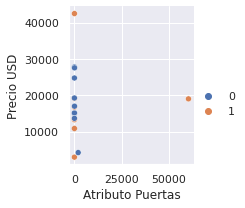

In [ ]:
g = sns.FacetGrid(cars_new_facet_grid_index_dropped)
g.map_dataframe(sns.scatterplot, x="Atributo Puertas", y="Precio USD", hue="clase de etiquetas")
g.add_legend()

#Formato de datos y definición de modelos
Primero, seleccionamos las columnas deseadas de nuestro conjunto de datos.



In [ ]:
# data selection
X = cars_new[['Atributo Puertas', 'Precio USD']]
y = cars["clase de etiquetas"]

# data splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Realizamos la estandarización
Scikit-learn también tiene una clase para eso, se llama StandardScaler . Veamos un ejemplo:

In [ ]:
from sklearn.preprocessing import StandardScaler 

# create the scaler 
stscaler = StandardScaler() 

# take the data you want to scale
X = cars_new[['Atributo Puertas','Precio USD']]

# apply the scaler to the data
X_scaled = stscaler.fit_transform(X)

Ahora, comparemos los datos antes y después de la estandarización.



In [ ]:
cars_new.describe()

,Precio USD,Atributo Año,Atributo Puertas,clase de etiquetas
count,86891.00000,86891.000000,86891.000000,86891.000000
mean,15988.24971,2011.794513,4.976511,0.668424
std,12179.86001,7.114097,204.461904,0.470782
min,504.90000,1900.000000,-2.000000,0.000000
25%,8200.00000,2010.000000,4.000000,0.000000
50%,13000.00000,2013.000000,4.000000,1.000000
75%,19500.00000,2016.000000,5.000000,1.000000
max,119900.00000,2022.000000,60241.000000,1.000000


Como era de esperar, podemos observar que la desviación estándar de los datos ahora es significativamente menor y el rango de los datos también es menor, por lo que los valores están más juntos.

En el siguiente paso, queremos comprobar si esta medida aporta algunos beneficios o inconvenientes para nuestro modelo.

#Definición de modelo
Luego podemos aplicar el modelo. Como es habitual con Scikit-learn, este es un proceso muy sencillo.

Podemos escribir el siguiente código python para representar los datos anteriores:

In [ ]:
# Paso 1: importamos la librería numérica NumPy
import numpy as np

# Paso 2: preparamos los datos
X = np.array([1,2,3, 4, 5, 6, 7,8, 9, 10]).reshape(-1,1)
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

#Aclaración: X es la cantidad de puertas que tien un automovil e y si tiene  traccion delantera o no!

In [ ]:
#Entrenamos un modelo de regresión logística

# Paso 3: importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Hacemos la predicción para: 1, 3, 5 ó 6 puertas de un automovil...

X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)

# Paso 6: Usa el modelo entrenado para obtener las predicciones con datos nuevos

prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

#Insight: Como podemos observar  tiene  traccion delantera o no!

[1 1 1 1 1 0]


In [ ]:
# Paso 7: Opcionalmente, obtenemos las probabilidades de la predicción
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
print(probabilidades_prediccion)

[[0.71394992 0.28605008]
 [0.66297201 0.33702799]
 [0.43149607 0.56850393]
 [0.22652003 0.77347997]]


In [ ]:
# Como seguramente estamos más interesados en la probabilidad de aprobar, podemos centrarnos en la segunda columna
print(probabilidades_prediccion[:,1])

[0.28605008 0.33702799 0.56850393 0.77347997]


In [ ]:
# defining and fitting the model on train dataset
logreg = LogisticRegression(C=100).fit(X_train, y_train)

# defining and fitting the model on the standardized dataset
logreg_scaled = LogisticRegression(C=100).fit(X_train_scaled, y_train)

NameError: ignored

Bien, el modelo está listo, ¡ahora veamos los resultados!



#¿La estandarización de los datos afecta la precisión del modelo?
Bueno, probablemente debido a un gran conjunto de datos, en absoluto. Veamos los resultados.



Resultados del conjunto de entrenamiento y prueba del modelo sin escala 


Resultados del conjunto de entrenamiento y prueba del modelo escalado

Contrariamente a nuestras expectativas, el resultado del entrenamiento no ha cambiado, mientras que el conjunto de prueba vio una pequeña disminución en la precisión.

Estos números se ven bien, pero ciertamente sería mejor probar el modelo en un ejemplo real, ¿no?

Prueba nr. 1 (fuente: autor)


Prueba nr. 2 (fuente: autor)


Probé el modelo en dos autos, un Ford Fiesta Sport de 2016 y un BMW M5 de 2018 . Y para ambos coches, la predicción del modelo es correcta.

#Visualización de resultados
Entonces nos preguntamos, ¿dónde está el límite entre los grupos de datos? Bueno, averigüémoslo.

Hay dos formas de crear la trama. Uno incluye calcular la pendiente y la intersección de la línea de límite de decisión y trazarla como una gráfica de línea simple. El otro enfoque crea una cuadrícula de malla y traza el límite como un contorno que divide los datos en dos mitades.

Hay dos formas de crear la trama. Uno incluye calcular la pendiente y la intersección de la línea de límite de decisión y trazarla como una gráfica de línea simple. El otro enfoque crea una cuadrícula de malla y traza el límite como un contorno que divide los datos en dos mitades.

Lo primero es lo primero, comenzamos con el enfoque más simple.

In [ ]:
# retreive the model parameters
b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T

# claculate the intercept and slope of the decision boundary
intercept = -b/w2
slope  = -w1/w2

Recuperamos los parámetros y luego calculamos la pendiente y la intersección del límite. Básicamente, estamos calculando una línea de regresión lineal, que describe la relación entre nuestro valor del eje X (desplazamiento) y el valor del eje Y (economía de combustible combinada).

In [ ]:
# creating the plot
xmin, xmax = 0, 7.5
ymin, ymax = 0, 60

xd = np.array([xmin, xmax])
yd = slope * xd + intercept

plt.plot(xd, yd, ls='--', c='grey')
plt.fill_between(xd, yd, ymin, color='red', alpha=0.1)
plt.fill_between(xd, yd, ymax, color='blue', alpha=0.1)

scatter = plt.scatter(X["displ"][:], X["comb"][:], c=y[:], s = 50, cmap = "RdBu", 
          vmin = -0.2, vmax = 1.2, edgecolor = "white", linewidth = 0.9)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel("Displacement [l]")
plt.ylabel("Combined fuel economy [mpg]")
plt.legend(*scatter.legend_elements())

plt.show()

Gráfica de límites de decisión usando plt.plot (fuente: autor)


Nuevamente, la etiqueta 1 representa la clase positiva (automóviles con tracción delantera), mientras que la etiqueta 0 representa todos los demás automóviles (clase negativa), en este caso, automóviles con tracción trasera y con tracción total.

La segunda forma de trazar el límite es mediante el método de contorno. Primero, se define una cuadrícula de malla, donde se define el mínimo y el máximo para ambas características (desplazamiento y economía de combustible combinada). Numpy.c_ concatena la matriz a lo largo del segundo eje. Y se calculan las probabilidades de cada punto de la cuadrícula. Es importante entender aquí que usamos nuestro modelo logreg aquí, cuyo propósito es visualizar la pendiente y la intersección .

In [ ]:
# definind the mesh grid and calculating the probabilities
xx, yy = np.mgrid[0:7.5:0.01, 0:60:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
probabilities = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)

A continuación, necesitamos definir la trama.

In [ ]:
# defining the boundary line plot
f, ax = plt.subplots(figsize=(8,6))
ax.contour(xx, yy, probabilities, levels = [0.5], 
                      cmap = "Greys", vmin =0, vmax = 1, linewidths = 2, linestyles = "dashed")

ax.contourf(xx, yy, probabilities, levels = [0.5,  1], 
                      cmap = "Blues", vmin =0, vmax = 1, alpha = 0.2)

ax.contourf(xx, yy, probabilities, levels = [0, 0.5], 
                      cmap = "Reds", vmin =0, vmax = 1, alpha = 0.2)

scatter = ax.scatter(X["displ"][:], X["comb"][:], c=y[:], s = 50, cmap = "RdBu", 
          vmin = -0.2, vmax = 1.2, edgecolor = "white", linewidth = 0.9)

ax.set(xlabel = "Displacement [l]", ylabel = "Combined fuel economy [mpg]")
ax.legend(*scatter.legend_elements());

Gráfica de límites de decisión usando el método de contorno

Para mostrar la línea de límite, solo mostramos la línea de contorno que intercepta el 50% de probabilidad de que un automóvil sea impulsado por las ruedas delanteras. Se predice que todos los autos por encima de la línea serán de tracción delantera ( clase positiva 1 ), mientras que se predice que todos los autos debajo de la línea NO SERÁN de tracción delantera, por lo que son de tracción trasera o de tracción total.

También podemos agregar probabilidad como un color a nuestro gráfico. Esto puede ayudar en la identificación visual de la probabilidad, por lo que se puede evaluar la probabilidad sin ejecutar el modelo o calcular la probabilidad exacta.

Aquí está el código:

In [ ]:
# ploting probability
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probabilities, 100, 
                      cmap = "RdBu", vmin =0, vmax = 1)

ax_c = f.colorbar(contour)
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1.00])
ax_c.set_label("P (Front-wheel driven) %")

ax.scatter(X["displ"][:], X["comb"][:], c=y[:], s = 30, cmap = "RdBu", 
          vmin = -0.2, vmax = 1.2, edgecolor = "white", linewidth = 0.9) 

ax.set(xlabel = "Displacement [l]", ylabel = "Combined fuel economy [mpg]");

Probabilidades trazadas como mapa de contorno

Debo señalar, que aquí tenemos 2 características, también tenemos un diagrama de 2 dimensiones. Más características agregarían dimensionalidad a la trama.

# Conclusión

A continuación, presentamos un ejemplo de cómo se puede utilizar la regresión logística para predecir la conducción de un automóvil de acuerdo con su Precio USD y cantidad de puertas combinadas. Además, se evalúa una técnica de estandarización de datos. Para este conjunto de datos en particular, la estandarización no tiene ningún efecto sobre la precisión del modelo.

El límite de decisión entre los dos grupos de datos de etiquetas (automóviles con tracción delantera y sin tracción delantera) se ha calculado y trazado utilizando dos técnicas. Además, se ha agregado un gráfico de mapa de contorno de las probabilidades.